In [69]:
import pandas as pd
import os
os.chdir('C:\\0-ece204\\pr4')

In [70]:
df =  pd.read_csv('hnsc_tcga_pan_can_atlas_2018_clinical_data.tsv', sep='\t', header=0)
df = df[['Overall Survival Status','Subtype']]
df.columns = [x.replace(' ', '_') for x in df.columns]
df

,Overall_Survival_Status,Subtype
0,0:LIVING,HNSC_HPV-
1,1:DECEASED,HNSC_HPV-
2,1:DECEASED,HNSC_HPV-
3,1:DECEASED,HNSC_HPV-
4,1:DECEASED,HNSC_HPV-
...,...,...
518,1:DECEASED,HNSC_HPV-
519,1:DECEASED,HNSC_HPV-
520,0:LIVING,HNSC_HPV+
521,1:DECEASED,HNSC_HPV-


In [71]:
df = df.dropna()
df

,Overall_Survival_Status,Subtype
0,0:LIVING,HNSC_HPV-
1,1:DECEASED,HNSC_HPV-
2,1:DECEASED,HNSC_HPV-
3,1:DECEASED,HNSC_HPV-
4,1:DECEASED,HNSC_HPV-
...,...,...
518,1:DECEASED,HNSC_HPV-
519,1:DECEASED,HNSC_HPV-
520,0:LIVING,HNSC_HPV+
521,1:DECEASED,HNSC_HPV-


In [72]:
df = pd.get_dummies(df)
df

,Overall_Survival_Status_0:LIVING,Overall_Survival_Status_1:DECEASED,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
518,0,1,0,1
519,0,1,0,1
520,1,0,1,0
521,0,1,0,1


In [73]:
from scipy.stats import pearsonr
correlation_coef, p_value = pearsonr(df['Overall_Survival_Status_0:LIVING'], df['Subtype_HNSC_HPV+'])
p_value

0.00036633236711967735

In [74]:
correlation_matrix = df.corr()
correlation_matrix

,Overall_Survival_Status_0:LIVING,Overall_Survival_Status_1:DECEASED,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
Overall_Survival_Status_0:LIVING,1.000000,-1.000000,0.160826,-0.160826
Overall_Survival_Status_1:DECEASED,-1.000000,1.000000,-0.160826,0.160826
Subtype_HNSC_HPV+,0.160826,-0.160826,1.000000,-1.000000
Subtype_HNSC_HPV-,-0.160826,0.160826,-1.000000,1.000000


<AxesSubplot:>

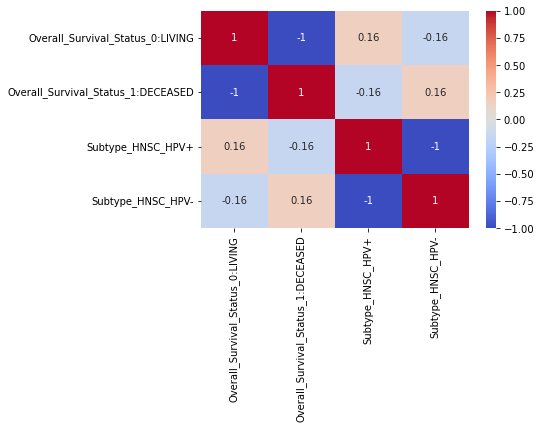

In [75]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')